# Úkol č. 2 - regrese

* Termíny jsou uvedeny na [courses.fit.cvut.cz/BI-ML1/homeworks/index.html](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu, ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s regresní úlohou, s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí délky dožití v různých zemích a letech.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:

* Year - Rok
* Status - Status rozvinuté nebo rozvojové země
* Life expectancy - Délka dožití v letech - **cílová proměnná, kterou budete predikovat**
* Adult Mortality - Úmrtnost dospělých bez ohledu na pohlaví (pravděpodobnost, že osoby, které dosáhly věku 15 let, zemřou před dosažením věku 60 let (uvedeno na 1 000 osob)).
* infant deaths - počet zemřelých kojenců na 1000 obyvatel
* Alcohol - Alkohol, zaznamenaná spotřeba na obyvatele (15+) (v litrech čistého alkoholu)
* percentage expenditure - Výdaje na zdravotnictví v procentech hrubého domácího produktu na obyvatele (%)
* Hepatitis B - pokrytí očkováním proti hepatitidě B (HepB) u dětí ve věku 1 roku (%)
* Measles - Spalničky - počet hlášených případů na 1000 obyvatel
* BMI - průměrný index tělesné hmotnosti celé populace
* under-five deaths - počet úmrtí dětí do pěti let na 1000 obyvatel
* Polio - proočkovanost proti dětské obrně (Pol3) u dětí ve věku 1 roku (%)
* Total expenditure - Výdaje vládních institucí na zdravotnictví jako procento celkových vládních výdajů (%)
* Diphtheria - pokrytí očkováním proti záškrtu, tetanu a černému kašli (DTP3) u jednoletých dětí (%)
* HIV/AIDS - počet úmrtí na 1 000 živě narozených dětí na HIV/AIDS (0-4 roky)
* GDP - hrubý domácí produkt na obyvatele (v USD)
* Population - počet obyvatel země
* thinness 1-19 years - podíl dětí ve věku 10-19 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* thinness 5-9 years - podíl dětí ve věku 5-9 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* Income composition of resources - Index lidského rozvoje z hlediska příjmového složení zdrojů (index v rozmezí 0 až 1)
* Schooling - počet let školní docházky (roky)


## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném regresním modelu.
    * Nějakým způsobem (klidně triviálním) se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace. Vše stručně ale náležitě komentujte.
<br /><br />
  * Vytvořte **vlastní implementaci náhodného lesa**. Použijte k tomu níže předpřipravenou kostru.
  
  * Na připravená data postupně aplikujte Vaši předchozí implementaci modelu náhodného lesa, dále jeden z modelů **lineární regrese** nebo **hřebenové regrese**, a alespoň jeden další model podle Vašeho uvážení, přičemž pro každý z těchto modelů přiměřeně:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Experimentujte s normalizací (standardizace/min-max), pokud pro daný model očekáváte její příznivý vliv.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty (vzhledem k RMSE).
    * Pro model s nejlepšími hodnotami hyperparametrů na validační množině určete jeho chybu pomocí RMSE a MAE.
    * Získané výsledky vždy řádně okomentujte.
<br /><br />
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a správně odhadněte, jakou chybu (RMSE) můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data. Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **Life expectancy** a jednotlivé body identifikujete pomocí sloupců **Country** a **Year** (dodržte názvy sloupců!). Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka, jak by mělo vypadat prvních několik řádků souboru `results.csv` (obecně s jinými hodnotami Life expectancy):
  
```
Country,Year,Life expectancy
Peru,2012,71.4
Peru,2013,72.6
...
```


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

## Read and divide data into three groups (train, val, test)

In [3]:
#cd ./02

In [4]:
raw_df = pd.read_csv('data.csv')
Xdata = raw_df.drop(columns='Life expectancy')
ydata = raw_df['Life expectancy']

r_seed = 1111 # for debug
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.4, random_state=r_seed) 
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=r_seed) 

## Create scikit piplines

I am going to use **Scikit-learn pipeline** for **data preprocessing** and **further model tuning**.

First of all, I need to identify numeric and categorical features.

In [5]:
numerical_features = ['Year', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']
categorical_features = ['Country', 'Status']

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

Secondly, I got to create transformers for each group and then combine them into a single ColumnTransformer. I decided to use mean strategy for imputing NA values for numerical features, for categorical features most frequent value will be used. For numerical values StandardScaler() and MinMaxScaler() will be used and for categorical OneHotEncoder() that for unknown categories will fill zeros in rows.

In [7]:
numerical_transformer_standard = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # pipeline will 'remember' mean value on .fit() 
                                                 # and then it will use it to preprocess data for prediction
    ('std_scaler', StandardScaler())             # Standardize features
])

numerical_transformer_minmax = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('minmax_scaler', MinMaxScaler())            # Normalize features to [0, 1]
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('1hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

col_trans_standard = ColumnTransformer(
    transformers=[
        ('num_trans', numerical_transformer_standard, numerical_features),  # Standardization for numerical features
        ('cat_trans', categorical_transformer, categorical_features)        # One-hot encode categorical features
    ],
    remainder='drop',  # Dropping other features
    n_jobs=-1          # Use all available processors
)

col_trans_minmax = ColumnTransformer(
    transformers=[
        ('num_trans', numerical_transformer_minmax, numerical_features),  # Min-max scaling for numerical features
        ('cat_trans', categorical_transformer, categorical_features)
    ],
    remainder='drop',
    n_jobs=-1  
)

Xtrain_prepared_standard = col_trans_standard.fit_transform(Xtrain)
Xval_prepared_standard = col_trans_standard.transform(Xval)

Xtrain_prepared_minmax = col_trans_minmax.fit_transform(Xtrain)
Xval_prepared_minmax = col_trans_minmax.transform(Xval)

## My CustomRandomForest implementation

In [8]:
from sklearn.tree import DecisionTreeRegressor
class CustomRandomForest:
    """
    Třída Vašeho modelu
    Bude se jednat o model náhodného lesa, kde podmodely tvoří rozhodovací stromy pro regresi.
    Pro podmodely můžete použít implementaci DecisionTreeRegressor ze sklearn.
    """
    def __init__(self, n_estimators, max_samples, max_depth, **kwargs):
        """
        Konstruktor modelu
        Základní hyperparametery:
            n_estimators - počet podmodelů - rozhodovacích stromů.
            max_samples - tento parametr bude označovat relativní počet bodů (tj. číslo mezi 0 a 1)             
            max_depth - maximální hloubka každého z podmodelů rozhodovacího stromu.
            kwargs - (volitelně) případné další hyperparametry, které pošlete do podmodelů rozhodovacího stromu
        """
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.max_depth = max_depth
        self.kwargs = kwargs
        self.trees = [DecisionTreeRegressor(max_depth=self.max_depth, **self.kwargs) for _ in range(self.n_estimators)]
        
        
    def fit(self, X, y):
        """
        Natrénování modelu. Trénovací data jsou v argumentech X a y.
        Pro trénování podmodelů používejte bootstraping a velikost samplovaného vzorku vezměte z hyperparametru max_samples
        """
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X = X.to_numpy()
        if isinstance(y, pd.Series):
            y = y.to_numpy()
        n_samples = X.shape[0]
        for tree in self.trees:
            # Bootstrap sampling
            sample_indices = np.random.choice(n_samples, int(self.max_samples * n_samples), replace=True)
            X_sample, y_sample = X[sample_indices], y[sample_indices]
            tree.fit(X_sample, y_sample)
        
    def predict(self, X):
        """
        Predikce y v zadaných bodech X
        """
        ypredicted = np.zeros((X.shape[0],))
        # Collect all predictions
        predictions = np.array([tree.predict(X) for tree in self.trees])
        ypredicted = np.mean(predictions, axis=0)
        return ypredicted

**Suitability of RandomForest for this problem:**
+ can handle complex, non-linear relationships between features, which may be present in this dataset.
+ the dataset includes ~20 features, which RandomForest can manage efficiently by selecting subsets of features for splits in each tree.

But on the other hand:
+ computational complexity is relatively high.
+ potential overfitting (while RandomForest reduces overfitting compared to a single decision tree, it can still overfit the training data).
+ RandomForest can become biased towards dominant patterns in dataset without additional handling (such as weighting).

In [9]:
from sklearn.model_selection import ParameterGrid
import sklearn.metrics as metrics

We will use **ParameterGrid** to iterate over and find the best combination of the hyperparameters. The main ones here are n_estimators, max_depth, max_samples and DecisionTreeRegressor params(min_samples_split, min_samples_leaf).

In [10]:

rf_param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [5, 10, None],
    'max_samples': [0.5, 0.7, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5]
}

rf_best_params = None
rf_best_rmse = float('inf')
rf_mae = None

# Iterate over params
for params in tqdm(ParameterGrid(rf_param_grid)):
    # Init and train
    model = CustomRandomForest(**params)
    model.fit(Xtrain_prepared_standard, ytrain)
    
    # Predict and evaluate on a validation data set
    ypred = model.predict(Xval_prepared_standard)
    rmse = metrics.root_mean_squared_error(yval, ypred)
    # Update best
    if rmse < rf_best_rmse:
        rf_best_rmse = rmse
        rf_best_params = params
        rf_mae = metrics.mean_absolute_error(yval, ypred)


100%|█████████████████████████████████████████| 216/216 [05:51<00:00,  1.63s/it]


In [11]:
print("Best Parameters:", rf_best_params)
print("Best RMSE:", rf_best_rmse)
print("MAE:", rf_mae)

Best Parameters: {'max_depth': None, 'max_samples': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best RMSE: 1.908774124963644
MAE: 1.1885024509803943


We can say that the Random Forest model demonstrates solid predictive performance with relatively low RMSE and MAE.

## Ridge Regression 

**Suitability of Ridge Regression for this problem:**
+ ridge regression is simple to implement and easy to interpret.
+ low computational cost.
+ handles continuous features well: Life expectancy and its predictors, such as GDP, BMI, and mortality rates, are mostly continuous variables, which ridge regression can model effectively.

But on the other hand:
+ assumes linear relationships where they may not be.
+ although Ridge regression specifically corrects for multicollinearity it still has that problem.
+ sensitive to outliers.

I'll perform the same steps as before:

In [12]:
from sklearn.linear_model import Ridge

In [13]:
rr_param_grid = {
    'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1, 10, 100],  # Regularization strength
}

# Separate versions for standardization and min-max normalization
rr_best_params_standard = None
rr_best_rmse_standard = float('inf')
rr_mae_standard = None
rr_pred_standard = None

rr_best_params_minmax = None
rr_best_rmse_minmax = float('inf')
rr_mae_minmax = None
rr_pred_minmax = None

# Iterate over parameter grid for Standardized data
for params in tqdm(ParameterGrid(rr_param_grid)):
    model = Ridge(**params)
    # Fit and evaluate
    model.fit(Xtrain_prepared_standard, ytrain)
    ypred_standard = model.predict(Xval_prepared_standard)
    rmse_standard = metrics.root_mean_squared_error(yval, ypred_standard)
    # Update best parameters
    if rmse_standard < rr_best_rmse_standard:
        rr_best_rmse_standard = rmse_standard
        rr_best_params_standard = params
        rr_mae_standard = metrics.mean_absolute_error(yval, ypred_standard)
        rr_pred_standard = ypred_standard

# Iterate over parameter grid for Min-Max Normalized data
for params in tqdm(ParameterGrid(rr_param_grid)):
    # Min-Max Normalization pipeline
    model = Ridge(**params)
    # Fit and evaluate
    model.fit(Xtrain_prepared_minmax, ytrain)
    ypred_minmax = model.predict(Xval_prepared_minmax)
    rmse_minmax = metrics.root_mean_squared_error(yval, ypred_minmax)
    # Update best parameters
    if rmse_minmax < rr_best_rmse_minmax:
        rr_best_rmse_minmax = rmse_minmax
        rr_best_params_minmax = params
        rr_mae_minmax = metrics.mean_absolute_error(yval, ypred_minmax)
        rr_pred_minmax = ypred_minmax

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 121.98it/s]


In [14]:
print("Best Parameters (Standardized):", rr_best_params_standard)
print("Best RMSE (Standardized):", rr_best_rmse_standard)
print("MAE (Standardized):", rr_mae_standard)
print()
print("Best Parameters (Min-Max Normalized):", rr_best_params_minmax)
print("Best RMSE (Min-Max Normalized):", rr_best_rmse_minmax)
print("MAE (Min-Max Normalized):", rr_mae_minmax)

Best Parameters (Standardized): {'alpha': 0.001}
Best RMSE (Standardized): 1.8412191974784646
MAE (Standardized): 1.2128136166783956

Best Parameters (Min-Max Normalized): {'alpha': 0.0001}
Best RMSE (Min-Max Normalized): 1.8404023801229608
MAE (Min-Max Normalized): 1.2119218404562824


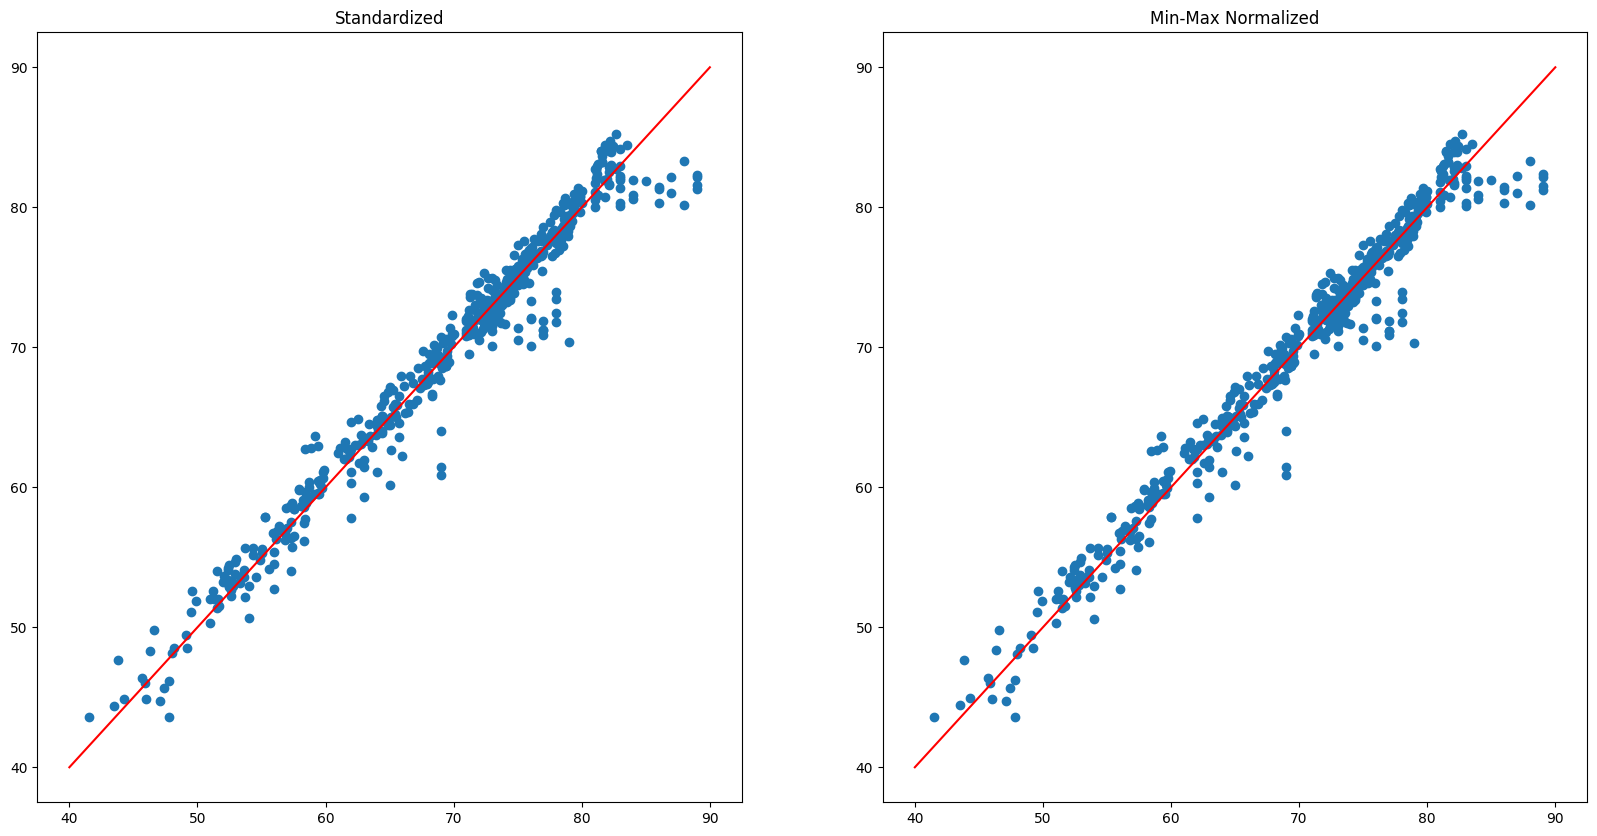

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
axes[0].set_title("Standardized")
axes[0].scatter(yval, rr_pred_standard)
axes[0].plot([40,90], [40,90], 'r')
axes[1].set_title("Min-Max Normalized")
axes[1].scatter(yval, rr_pred_minmax)
axes[1].plot([40,90], [40,90], 'r');

So, from plots and analysis:
+ both approaches produce predictions that closely follow the ideal line (red line).
+ the scatter around the line is minimal for both, indicating comparable performance (they are almost identical).
+ there are no significant deviations in either approach.

## KNN 

**Suitability of KNN for this problem:**
+ KNN is simple to implement and does not require any training phase, making it intuitive to understand and apply.
+ KNN can model complex, nonlinear relationships in the data, which might be present in predicting life expectancy.
+ KNN handles both continuous and categorical features well after appropriate preprocessing.

But on the other hand:
+ KNN is sensitive to the choice of the distance metric that may not be intuitively easy to choose.
+ High computational cost during prediction, especially with large datasets, as it requires calculating distances to all training points. (Maybe not that relevant for such a small dataset)
+ KNN is highly sensitive to the presence of outliers and noise in the data, which can distort distance calculations and lead to poor predictions.

I'll perform the same steps as before:

In [16]:
from sklearn.neighbors import KNeighborsRegressor

In [17]:
knn_param_grid = {
    'n_neighbors': [3, 5, 10, 15],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'p': [1, 2]  # Distance metric: 1 = Manhattan, 2 = Euclidean
}

# Separate versions for standardization and min-max normalization
knn_best_params_standard = None
knn_best_rmse_standard = float('inf')
knn_mae_standard = None

knn_best_params_minmax = None
knn_best_rmse_minmax = float('inf')
knn_mae_minmax = None

# Iterate over parameter grid for Standardized data
for params in tqdm(ParameterGrid(knn_param_grid)):
    model = KNeighborsRegressor(**params)
    # Fit and evaluate
    model.fit(Xtrain_prepared_standard, ytrain)
    ypred_standard = model.predict(Xval_prepared_standard)
    rmse_standard = metrics.root_mean_squared_error(yval, ypred_standard)
    # Update best parameters
    if rmse_standard < knn_best_rmse_standard:
        knn_best_rmse_standard = rmse_standard
        knn_best_params_standard = params
        knn_mae_standard = metrics.mean_absolute_error(yval, ypred_standard)

# Iterate over parameter grid for Min-Max Normalized data
for params in tqdm(ParameterGrid(knn_param_grid)):
    # Min-Max Normalization pipeline
    model = KNeighborsRegressor(**params)
    # Fit and evaluate
    model.fit(Xtrain_prepared_minmax, ytrain)
    ypred_minmax = model.predict(Xval_prepared_minmax)
    rmse_minmax = metrics.root_mean_squared_error(yval, ypred_minmax)
    # Update best parameters
    if rmse_minmax < knn_best_rmse_minmax:
        knn_best_rmse_minmax = rmse_minmax
        knn_best_params_minmax = params
        knn_mae_minmax = metrics.mean_absolute_error(yval, ypred_minmax)

100%|███████████████████████████████████████████| 16/16 [00:00<00:00, 29.80it/s]


In [18]:
print("Best Parameters (Standardized):", knn_best_params_standard)
print("Best RMSE (Standardized):", knn_best_rmse_standard)
print("MAE (Standardized):", knn_mae_standard)
print()
print("Best Parameters (Min-Max Normalized):", knn_best_params_minmax)
print("Best RMSE (Min-Max Normalized):", knn_best_rmse_minmax)
print("MAE (Min-Max Normalized):", knn_mae_minmax)

Best Parameters (Standardized): {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best RMSE (Standardized): 1.8986615879453583
MAE (Standardized): 1.223239795048956

Best Parameters (Min-Max Normalized): {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best RMSE (Min-Max Normalized): 1.896498386061394
MAE (Min-Max Normalized): 1.1288301046346694


Conclusion for KNN: Min-Max Normalized KNN performs slightly better overall (Lower RMSE and noticeably lower MAE).

## Compare the models

In [19]:
print(rf_best_rmse, rr_best_rmse_standard, rr_best_rmse_minmax, knn_best_rmse_standard, knn_best_rmse_minmax)
min(rf_best_rmse, rr_best_rmse_standard, rr_best_rmse_minmax, knn_best_rmse_standard, knn_best_rmse_minmax)

1.908774124963644 1.8412191974784646 1.8404023801229608 1.8986615879453583 1.896498386061394


1.8404023801229608

In [20]:
print('Okay, as we can see Best RMSE is achieved by Ridge Regression (Min-Max Normalized) with parameters:', rr_best_params_minmax)

Okay, as we can see Best RMSE is achieved by Ridge Regression (Min-Max Normalized) with parameters: {'alpha': 0.0001}


Let's create our final pipeline:

In [21]:
final_pipeline = Pipeline(steps=[
    ('preprocessor', col_trans_minmax),
    ('model', Ridge(**rr_best_params_minmax))
])

In [22]:
final_pipeline.fit(Xtrain, ytrain)
final_ypred = final_pipeline.predict(Xval)
final_rmse = metrics.root_mean_squared_error(yval, final_ypred)
final_mae = metrics.mean_absolute_error(yval, final_ypred)
print( 'RMSE of the best model on validation dataset:', final_rmse)
print( 'MAE of the best model on validation dataset:', final_mae)

RMSE of the best model on validation dataset: 1.8404023801229608
MAE of the best model on validation dataset: 1.2119218404562824


## What **RMSE** we can expect on new data?

In [23]:
# Predict on the test dataset
ytest_pred = final_pipeline.predict(Xtest)

# Calculate RMSE
test_rmse = metrics.root_mean_squared_error(ytest, ytest_pred)
print(f"Expected RMSE on new data: {test_rmse:.2f}")

Expected RMSE on new data: 1.88


## Calculate results.csv

In [24]:
# Load the evaluation data
evaluation_data = pd.read_csv('evaluation.csv')

# Generate predictions using the final model
evaluation_data['Life expectancy'] = final_pipeline.predict(evaluation_data)

# Save the results
results = evaluation_data[['Country', 'Year', 'Life expectancy']]
results.to_csv('results.csv', index=False)